# This is taken from k = 55 (P), k = 4 (LVM1), k = 5 (LVM2) after post-clustering neighborhood determination by MetaNeighbor

##

In [1]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

In [6]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
library(stringr)
library(scImpute)
library(SummarizedExperiment)
###readin1
load(file="metaneighbor/041718_post_clust_overclust.RData")

In [7]:
%%R
####################save files in preparation for scImpute
####save counts
counts <- as.matrix(counts(scdata_clustd))
saveRDS(counts, file="scImpute_all_k55/041718_scImpute.rds")

In [4]:
%%R
#####define file_path
in_path <- paste(getwd(),"scImpute_all_k55/041718_scImpute.rds",sep="/")
out_path <- paste(getwd(),"scImpute_all_k55/",sep="/")
#####run scImpute on all cells together
scimpute(in_path, infile = "rds", outfile = "rds", out_path,
  labeled = TRUE, drop_thre = 0.5, Kcluster = NULL, labels = scdata_clustd$Celltype,
  ncores = 15)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 13311"
[1] "number of cells in raw count matrix 7418"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "estimating dropout probability for type 3 ..."
[1] "imputing dropout values for type 3 ..."
[1] "estimating dropout probability for type 4 ..."
[1] "imputing dropout values for type 4 ..."
[1] "estimating dropout probability for type 5 ..."
[1] "imputing dropout values for type 5 ..."
[1] "estimating dropout probability for type 6 ..."
[1] "imputing dropout values for type 6 ..."
[1] "estimating dropout probability for type 7 ..."
[1] "imputing dropout values for type 7 ..."
[1] "estimating dropout probability for type 8 ..."
[1] "imputing dropout values for type 8 ..."
[1] "estimating dropout probability for type 9 ..."
[1] "imputing dropout values for type 9

## post imputation 

In [6]:
%%R
######remove parentally imputed data ; k=55 probably not accurate for use
###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
library(stringr)
library(SummarizedExperiment)
###readin master dataset (pre-imputation)
load(file="metaneighbor/041718_post_clust_overclust.RData")
###readin imputed matrix
imputed <- readRDS("scImpute_all_k55/scimpute_count.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

In [7]:
%%R
####append labels to matrix
scdata_imputed <- SingleCellExperiment(assays = list(counts = imputed),colData=colData(scdata_clustd))
####pull out only those are not parental
scdata_imputed <- scdata_imputed[ , colData(scdata_imputed)$Study_ID != "P"]

In [8]:
%%R
####pull out parental values from master dataset (pre-imputation)
scdata_notimputed <- scdata_clustd[ , colData(scdata_clustd)$Study_ID == "P"]

In [15]:
%%R
####combine parental values with imputed values
counts_all = cbind(counts(scdata_notimputed),counts(scdata_imputed))
scdata_combined <- SingleCellExperiment(assays = list(counts = counts_all),colData=colData(scdata_clustd))

In [18]:
%%R
###########calculate logcounts
logcounts(scdata_combined) <- log2(as.matrix(counts(scdata_combined)) + 1)
###########run TSNE
perplex=50
scdata_combined <- runTSNE(scdata_combined,exprs_values='logcounts',perplexity = perplex,rand_seed = 50000)

In [48]:
%%R
######formatting
###read in metadata
Sample_ID <- scdata_combined$Sample_ID
Study_ID <- scdata_combined$Study_ID
Celltype <- scdata_combined$Celltype
######format parental metadata so that cells are individual ; from final round of metaneighbor clustering
for (i in 1:length(Sample_ID)){
    if (Study_ID[i]=="P"){
        Celltype[i] <- paste("P",i,sep="_")
    }
}
scdata_combined$Celltype <- Celltype

In [49]:
%%R
#########save file
saveRDS(scdata_combined, file="scImpute_all_k55/parental_removed.rds")

# Visualize

In [50]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
library(stringr)
library(scImpute)
library(SummarizedExperiment)
###readin1
scdata <- readRDS("scImpute_all_k55/parental_removed.rds")

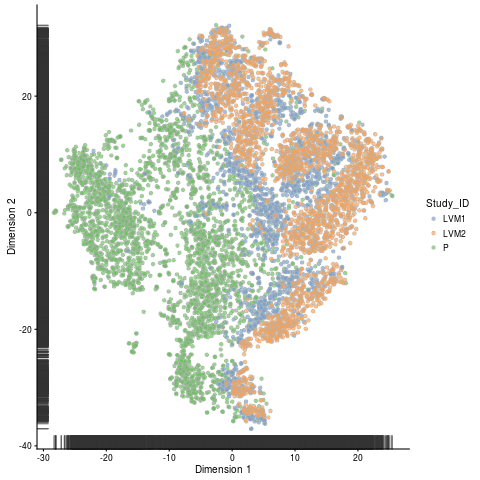

In [51]:
%%R
###plot TSNE
plotTSNE(
    scdata,
    colour_by = "Study_ID"
)

# ##

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

  warnings.warn(x, RRuntimeWarning)


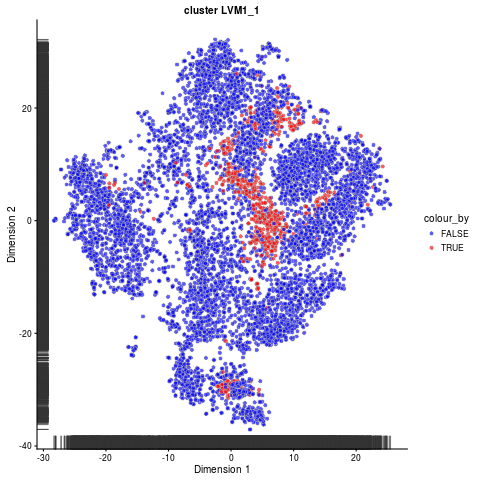

In [6]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_1"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

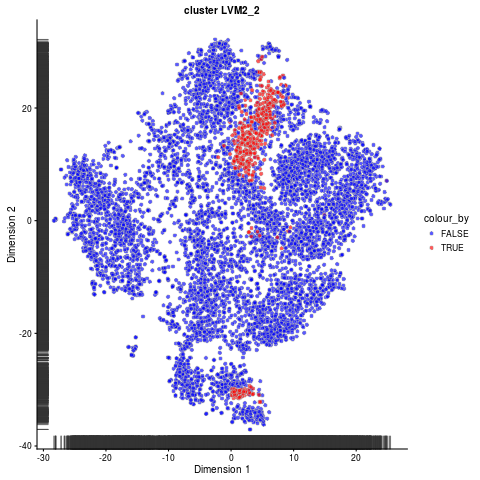

In [7]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_2"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

# ##

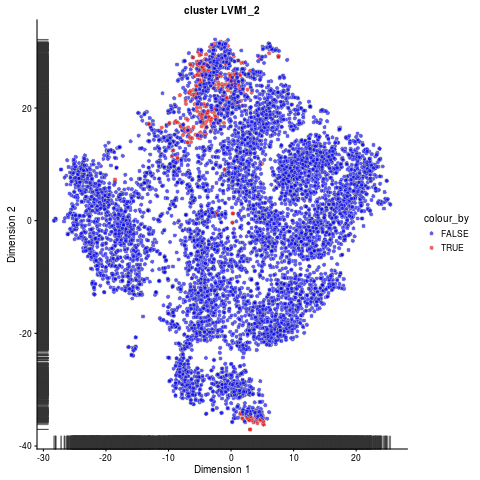

In [8]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_2"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

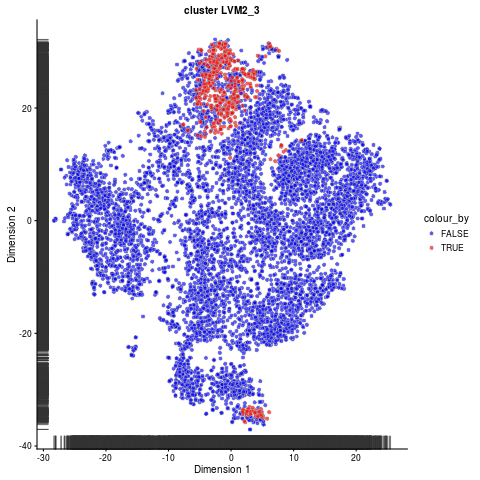

In [9]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_3"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

# ##

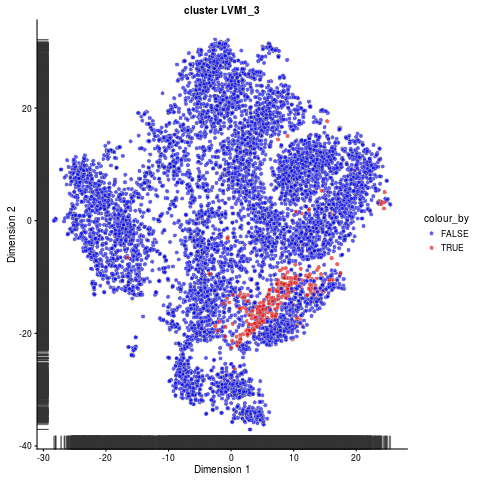

In [10]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_3"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

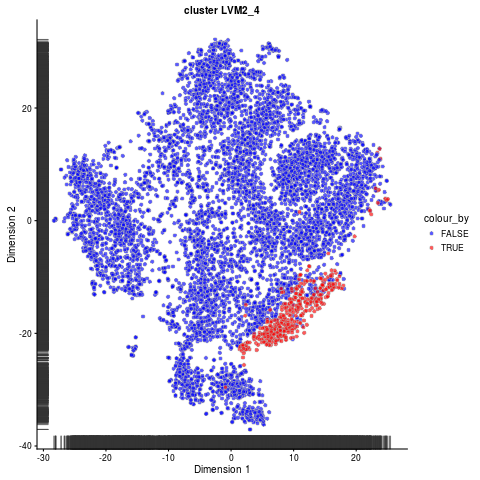

In [11]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_4"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

# ##

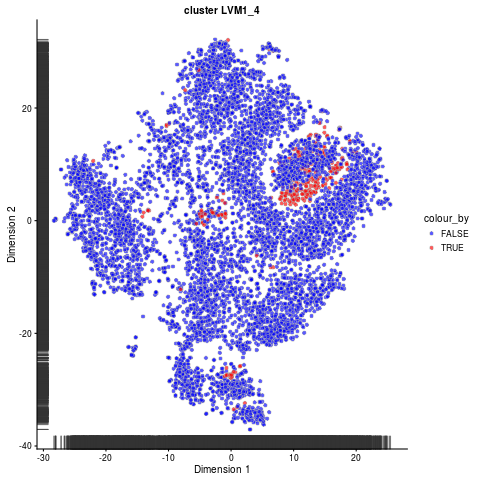

In [12]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_4"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

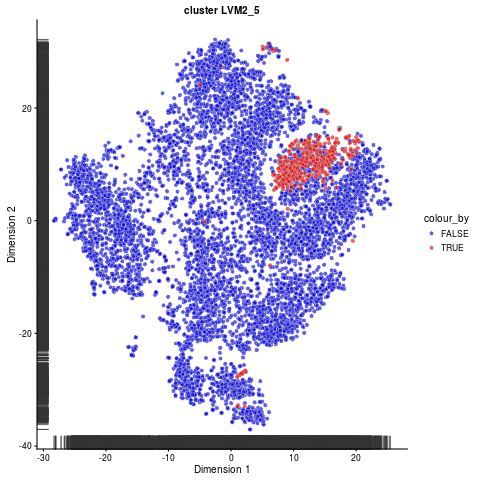

In [13]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_5"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

# ##

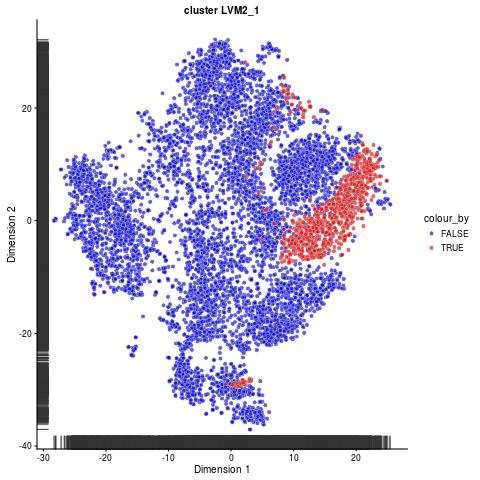

In [14]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_1"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="blue", "TRUE"="red"))

# ##

# Visualize P -> LVM1 -> LVM2

SC3 clustering of parental populations did not cluster well ; cells were far from each other, and silhouette plots from 1-100 showed low consistency between and within clusters. Therefore, metaneighbor matching between LVM1 clusters and Parental clusters were of poor quality.

Therefore, I tried a different approach which assigned each parental cell to its own cluster. I then used metaneighbor between each cell individually and LVM1 clusters, to see when treated individually if they would match LVM1. Briefly, here are the numbers of parental cells that matched the respective LVM1 cluster.

LVM1_1 ; 49
LVM1_2 ; 516
LVM1_3 ; 381
LVM1_4 ; 20

I am plotting the results of that analysis below.

In [62]:
%%bash
##############subset the results 
cd metaneighbor/results/

grep LVM1_1 041818_individual_top_hits.tsv > LVM1_1.tsv
grep LVM1_2 041818_individual_top_hits.tsv > LVM1_2.tsv
grep LVM1_3 041818_individual_top_hits.tsv > LVM1_3.tsv
grep LVM1_4 041818_individual_top_hits.tsv > LVM1_4.tsv

rm LVM1_1.list.tsv
rm LVM1_2.list.tsv
rm LVM1_3.list.tsv
rm LVM1_4.list.tsv

awk '$2 ~ "LVM1|LVM1_1" {print $3}' LVM1_1.tsv >> LVM1_1.list.tsv
awk '$2 ~ "LVM1|LVM1_2" {print $3}' LVM1_2.tsv >> LVM1_2.list.tsv
awk '$2 ~ "LVM1|LVM1_3" {print $3}' LVM1_3.tsv >> LVM1_3.list.tsv
awk '$2 ~ "LVM1|LVM1_4" {print $3}' LVM1_4.tsv >> LVM1_4.list.tsv

awk '$3 ~ "LVM1|LVM1_1" {print $2}' LVM1_1.tsv >> LVM1_1.list.tsv
awk '$3 ~ "LVM1|LVM1_2" {print $2}' LVM1_2.tsv >> LVM1_2.list.tsv
awk '$3 ~ "LVM1|LVM1_3" {print $2}' LVM1_3.tsv >> LVM1_3.list.tsv
awk '$3 ~ "LVM1|LVM1_4" {print $2}' LVM1_4.tsv >> LVM1_4.list.tsv

wc -l LVM1_1.list.tsv
wc -l LVM1_2.list.tsv
wc -l LVM1_3.list.tsv
wc -l LVM1_4.list.tsv

cd ../../

pwd

49 LVM1_1.list.tsv
516 LVM1_2.list.tsv
381 LVM1_3.list.tsv
20 LVM1_4.list.tsv
/avicenna/johnny/SC-RNAseq/10X_JY_HG_02/JY_HG_02/analysis


In [63]:
%%R
##########read Parental metaneighbor "clusters" into R lists
dir = "metaneighbor/results/"
file_pre = "LVM1_"
file_post = ".list.tsv"
###
for (filenum in 1:4){
    ######define file name based on index i
    file = paste(dir,file_pre,filenum,file_post,sep="")
    #####read in file
    tmp_list <- scan(file, what="", sep=' ')
    ####create temp list name for upcoming variable to used in later parts of notebook
    new_list <- paste("LVM1", filenum, sep="_")
    ####format the new list to remove annoying "P|" introduced by metaneighbor
    for (i in 1:length(tmp_list)){
        new_label <- substring(tmp_list[i], 3)
        tmp_list[i] <- new_label
    }
    #####assign value of file in tmp_list to new_list name of object
    assign(new_list,tmp_list)
}

## visualize 

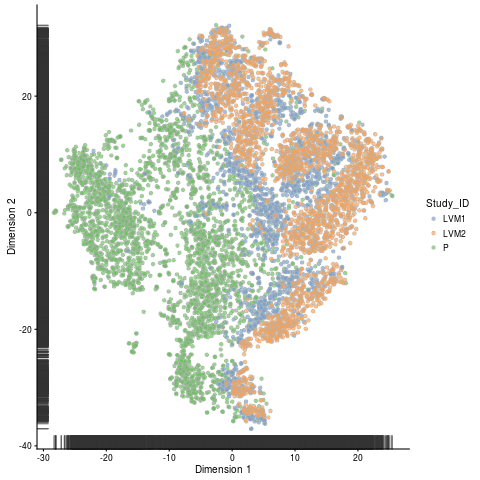

In [51]:
%%R
###plot TSNE
plotTSNE(
    scdata,
    colour_by = "Study_ID"
)

# outgrowth 1

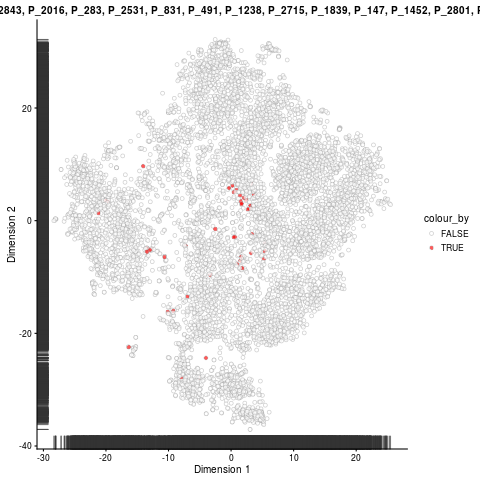

In [64]:
%%R
####define visualization cluster
vis_cluster <- LVM1_1
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp %in% vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

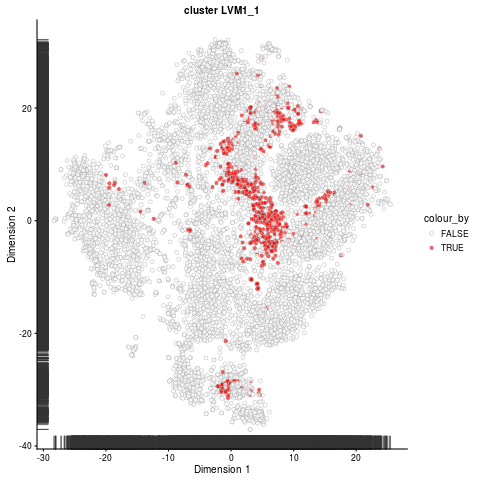

In [78]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_1"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

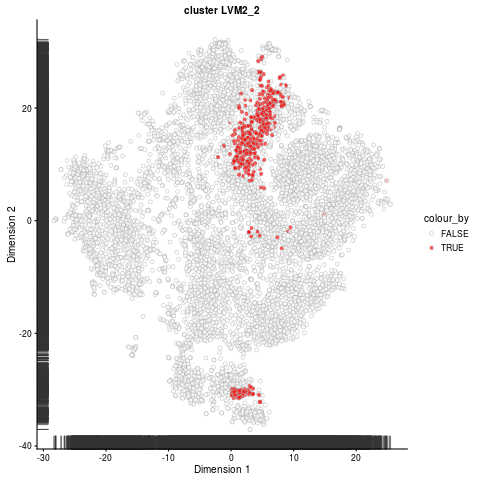

In [77]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_2"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

# outgrowth 2

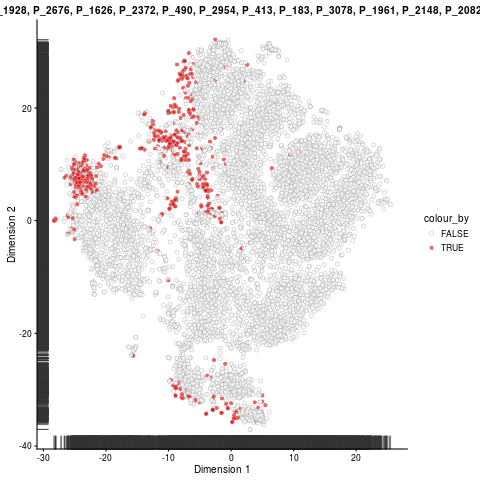

In [65]:
%%R
####define visualization cluster
vis_cluster <- LVM1_2
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp %in% vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

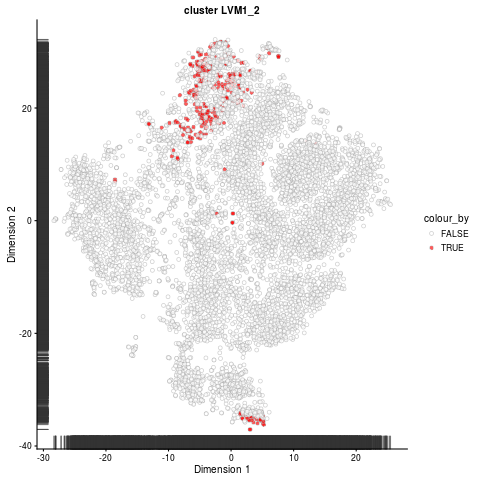

In [76]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_2"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

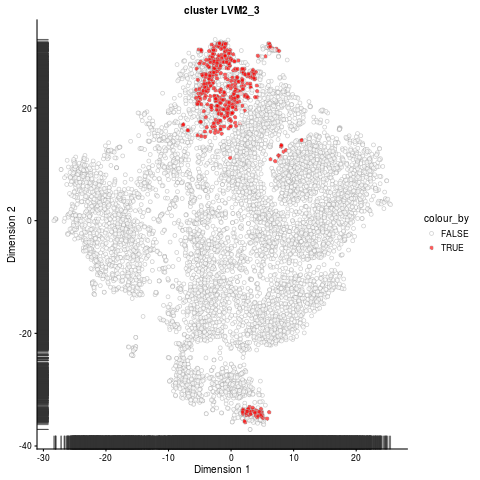

In [75]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_3"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

# outgrowth 3

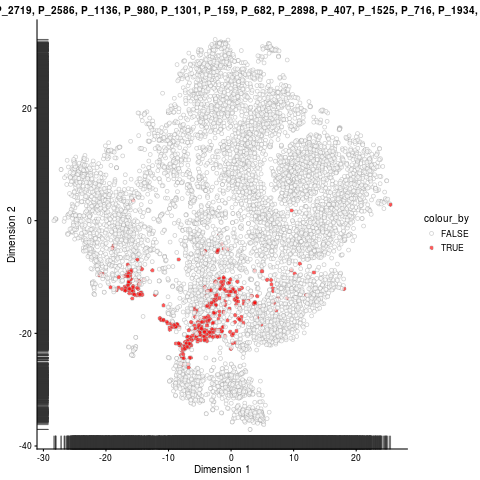

In [66]:
%%R
####define visualization cluster
vis_cluster <- LVM1_3
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp %in% vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

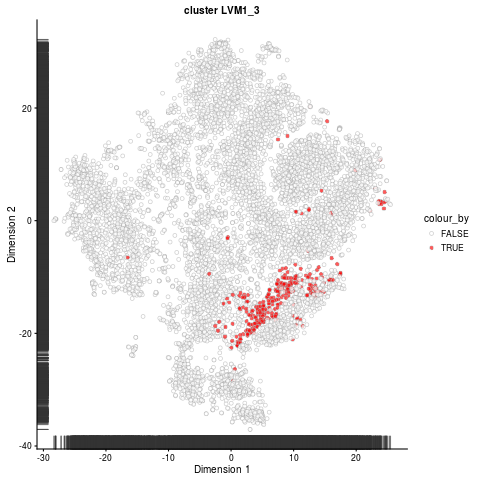

In [74]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_3"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

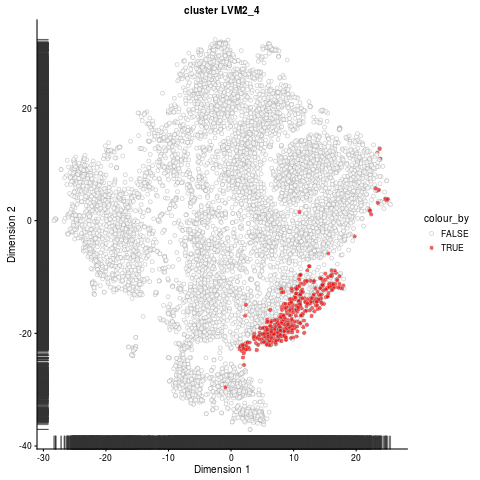

In [73]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_4"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

# outgrowth 5

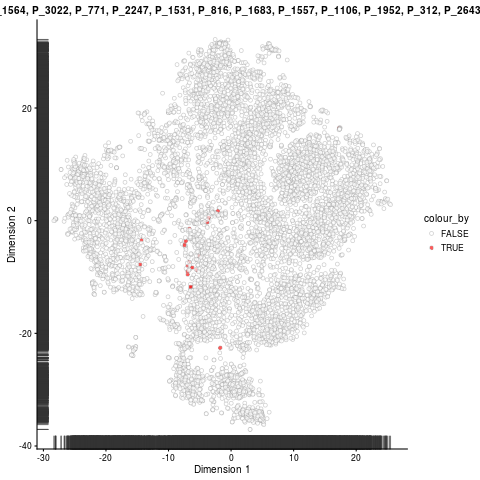

In [69]:
%%R
####define visualization cluster
vis_cluster <- LVM1_4
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp %in% vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

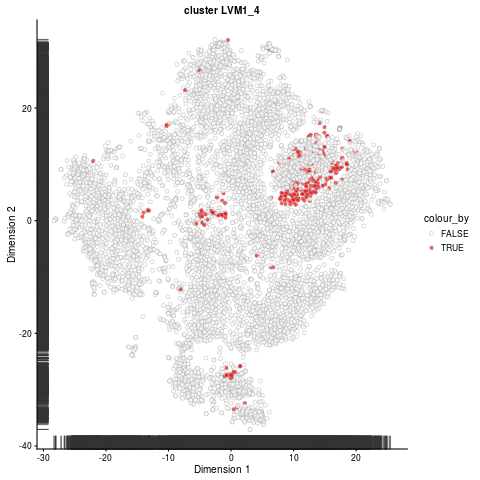

In [70]:
%%R
####define visualization cluster
vis_cluster <- "LVM1_4"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

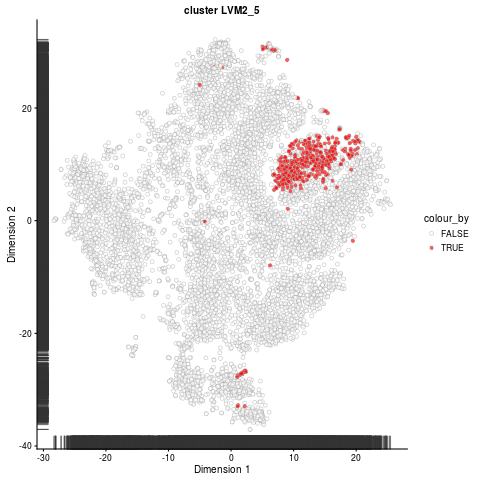

In [71]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_5"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))

# ##

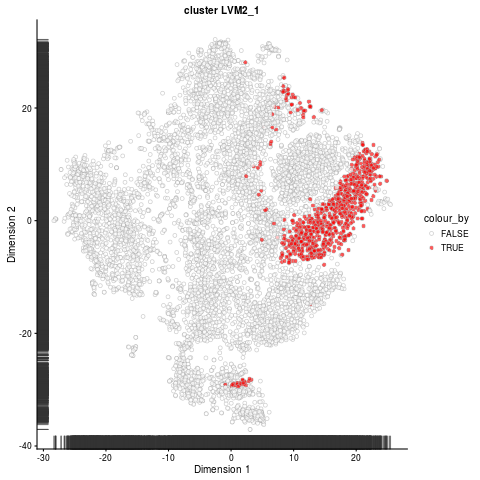

In [72]:
%%R
####define visualization cluster
vis_cluster <- "LVM2_1"
####read into object
tmp <- colData(scdata)$Celltype
tmp <- (tmp == vis_cluster)
colData(scdata)$vis_clust <- tmp
####plot
plotTSNE(
    scdata,
    colour_by = "vis_clust",
) + ggtitle(paste("cluster",toString(vis_cluster),sep=" ")) + scale_fill_manual(values=c("FALSE"="transparent", "TRUE"="red"))